# Popcorn exercise (with a solution)
We are going to collect our own data using microwave popcorn. Each group will receive one bag of microwave popcorn (please note the brand name). Due to time limitations, we will pop the popcorn for you, but take the results back to your desk.

Your next task is to **analyze the data.** However, what for? Well in some ways that’s up to you. What kind of things would you like to observe about this data (i.e., about the
popcorn)? Imagine that you a scientist with an interest to popcorn. What would you like to examine?
Some possibilities are:

* Something about the number?
* Something about the size of the popcorn?
* Something about the colour?
* Something about the success of popping (e.g., number popped, number not popped)?
* ???

We are going to use this data for the next class sessions to learn about data in general. We will examine data
characteristics, data manipulations, working with data in a Jupyter Notebook and other exercises. Therefore we need
to collect data in a format that you will be able to use and work with in the future. Basically, you need to
collect information about each popcorn kernel. Furthermore, you need to know which information goes
together, i.e., which data (measurements, descriptions, etc.) goes together (i.e., belongs to the same
popcorn kernel. So you need to collect data in a table format (for example):

ID | Popped | Size (longest) | Size (shortest) | Color  |
---|--------|----------------|-----------------|--------|
0  | Yes    | 11 mm          | 7 mm            | white  |
1  | Yes    | 13 mm          | 6 mm            | white  |
2  | No     | 5 mm           | 4 mm            | brown  |
3  | Yes    | 15 mm          | 14 mm           | yellow |

You must keep this table (both in paper and electronic format) as we will continue to work with this data.

OK, now **summarize your results** (of what you wanted to test or measure). What did you find out? How can
you easily present it for the rest of the class? How can you compare it to what the others found? Think of a
data format that would be useful for comparison. What can you (and the class as a whole) conclude from
this study?

Other thoughts…how would you **describe** the type of quantitative information (i.e., data) that you obtained
in the exercise?

Use some of the graphical techniques that you have learned to make appropriate visual representations of
the data (see exercises for session 2 also).

OK, once you are sure you have the information you need, you may “destructively sample” your popcorn.
Bon appetite!


# A Solution

## Write data to file on disk
First, we will save our popcorn data using the CSV data format. This allows us to analyze it in later exercises.  Below we write a raw text file to the disk named `popcorn.csv` where lengths are in physical units of a millimetre (mm), and the boolean `pooped` variable is either `True` or `False`. For simplisity the sizes are named `long` and `short`:

In [1]:
%%writefile popcorn.csv
popped,long,short,color
True,11,7,white
True,13,6,white
False,5,4,brown
True,15,14,yellow
True,12,10,white
True,14,7,white
True,13,9,white
True,16,12,yellow
True,13,10,white
True,10,8,white

Overwriting popcorn.csv


Next we load the CSV-file into a Pandas dataframe.

In [2]:
import pandas as pd
df = pd.read_csv('popcorn.csv')

## View raw data
To see if the data is loaded correctly we can write:

In [3]:
df

popped  long  short   color
0    True    11      7   white
1    True    13      6   white
2   False     5      4   brown
3    True    15     14  yellow
4    True    12     10   white
5    True    14      7   white
6    True    13      9   white
7    True    16     12  yellow
8    True    13     10   white
9    True    10      8   white

The tables can be format in different styles, that makes it easyer to get an overview of the values.

In [4]:
df.style.background_gradient()

## A bar plot
We can look at the values as a bar plot:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df.plot.bar()

## Pie chart of popcorn colors
Below we count how many popcorn we have of each color,

In [9]:
counts = df['color'].value_counts()
counts

white     7
yellow    2
brown     1
Name: color, dtype: int64

... and plot the results as a pie chart:

In [10]:
counts.plot.pie()

Let us make a more fancy pie chart:

In [16]:
counts.plot.pie(explode=(0, 0.2, 0.4),
                colors=counts.index,
                autopct=r'%.0f%%',
                shadow=True,
                wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid'})
plt.title('Colors of popcorn')

Text(0.5, 1.0, 'Colors of popcorn')

## Histograms

An histogram of the longest dimention of the popcorn (`long`):

Text(0.5, 0, 'Length in mm')

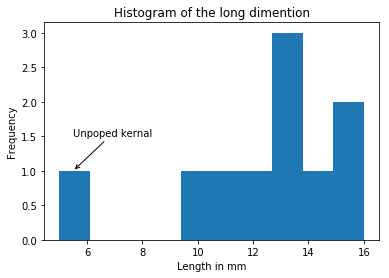

In [7]:
df['long'].plot.hist()
plt.title('Histogram of the long dimention')
plt.annotate('Unpoped kernal', xy=(5.5,1), xytext=(5.5,1.5), arrowprops=dict(arrowstyle="->"))
plt.xlabel('Length in mm')

## A box plot
The unpoped kernal looks like an outlier.
This can also be seen in an box plot:

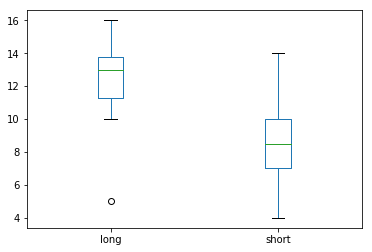

In [8]:
df.plot.box()

## Excluding unpoped kernal
From the above analysis we notice that the unpopped kernel is an outlier to the data set. Let us create an dataframe that does not include the  

In [12]:
df_poped = df[df['popped']]
df_poped

popped  long  short   color
0    True    11      7   white
1    True    13      6   white
3    True    15     14  yellow
4    True    12     10   white
5    True    14      7   white
6    True    13      9   white
7    True    16     12  yellow
8    True    13     10   white
9    True    10      8   white

In [13]:
df_poped.plot.box()

And lets describe some statistics

In [14]:
df_poped.describe()

long      short
count   9.000000   9.000000
mean   13.000000   9.222222
std     1.870829   2.587362
min    10.000000   6.000000
25%    12.000000   7.000000
50%    13.000000   9.000000
75%    14.000000  10.000000
max    16.000000  14.000000

Lat us make a scatter plot of the two meassued lengths

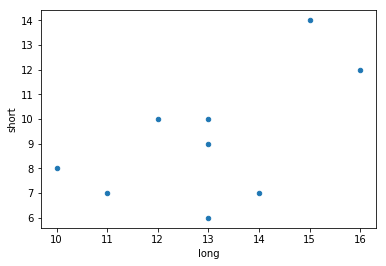

In [15]:
df_poped.plot.scatter(x='long',y='short')